In [3]:
import ast
import inspect
import os
import sys
import logging
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
import ast
import os

# 定义函数解析器
def parse_function_calls(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        tree = ast.parse(f.read())
    
    function_calls = []
    for node in ast.walk(tree):
        if isinstance(node, ast.Call) and isinstance(node.func, ast.Name):
            function_calls.append(node.func.id)
    return function_calls

# 解析 main.py 的函数调用
main_py_path = os.path.join("z:\\vosk-api", "main.py")
calls = parse_function_calls(main_py_path)
print("函数调用关系:", calls)

函数调用关系: ['configure_logging', 'get_logger', 'log_system_info', 'QApplication', 'Path', 'str', 'str', 'log_qt_info', 'PluginManager', 'ASRModelManager', 'MainWindow', 'main', 'str']


In [6]:
# 构建调用关系网络
def build_call_graph(function_calls):
    graph = nx.DiGraph()
    for call in function_calls:
        graph.add_node(call)
        # 示例：将调用关系添加为边（可根据实际调用关系调整）
        graph.add_edge("main", call)
    return graph

# 构建调用关系图
call_graph = build_call_graph(calls)
print("调用关系图节点:", call_graph.nodes)
print("调用关系图边:", call_graph.edges)

调用关系图节点: ['configure_logging', 'main', 'get_logger', 'log_system_info', 'QApplication', 'Path', 'str', 'log_qt_info', 'PluginManager', 'ASRModelManager', 'MainWindow']
调用关系图边: [('main', 'configure_logging'), ('main', 'get_logger'), ('main', 'log_system_info'), ('main', 'QApplication'), ('main', 'Path'), ('main', 'str'), ('main', 'log_qt_info'), ('main', 'PluginManager'), ('main', 'ASRModelManager'), ('main', 'MainWindow'), ('main', 'main')]


C:\env-vms\vosk-api\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36923 (\N{CJK UNIFIED IDEOGRAPH-903B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\env-vms\vosk-api\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36753 (\N{CJK UNIFIED IDEOGRAPH-8F91}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\env-vms\vosk-api\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35843 (\N{CJK UNIFIED IDEOGRAPH-8C03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\env-vms\vosk-api\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\env-vms\vosk-api\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\env-vms\vosk

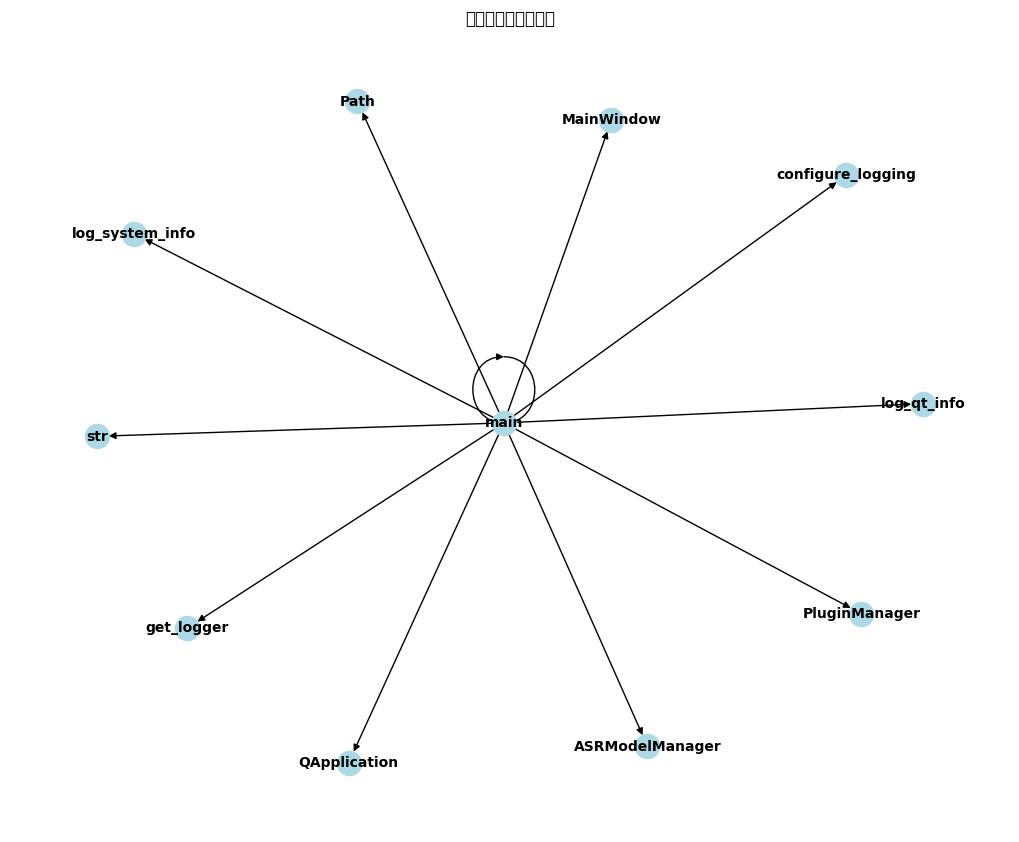

In [7]:
# 绘制调用关系网络图
def visualize_call_graph(graph):
    plt.figure(figsize=(10, 8))
    nx.draw(graph, with_labels=True, node_color="lightblue", font_size=10, font_weight="bold")
    plt.title("逻辑调用关系网络图")
    plt.show()

# 可视化调用关系图
visualize_call_graph(call_graph)

In [8]:
# 示例：分析核心组件调用关系
core_components = ["audio_processor", "file_transcriber", "subtitle_widget"]
for component in core_components:
    if component in call_graph.nodes:
        print(f"核心组件 {component} 存在于调用关系图中")
    else:
        print(f"核心组件 {component} 未在调用关系图中找到")

核心组件 audio_processor 未在调用关系图中找到
核心组件 file_transcriber 未在调用关系图中找到
核心组件 subtitle_widget 未在调用关系图中找到


In [9]:
# 解析 main_window.py 的函数调用关系
main_window_path = os.path.join("z:\\vosk-api", "src", "ui", "main_window.py")
calls_main_window = parse_function_calls(main_window_path)
print("main_window.py 函数调用关系:", calls_main_window)

# 检查核心组件是否在调用关系中
for component in core_components:
    if component in calls_main_window:
        print(f"核心组件 {component} 存在于 main_window.py 的调用关系中")
    else:
        print(f"核心组件 {component} 未在 main_window.py 的调用关系中找到")

main_window.py 函数调用关系: ['pyqtSlot', 'pyqtSlot', 'pyqtSlot', 'pyqtSlot', 'pyqtSlot', 'pyqtSlot', 'pyqtSlot', 'pyqtSlot', 'get_logger', 'TranscriptionSignals', 'AudioProcessor', 'print', 'print', 'print', 'QWidget', 'QVBoxLayout', 'SubtitleWidget', 'ControlPanel', 'MainMenu', 'hasattr', 'hasattr', 'print', 'print', 'QDialog', 'QVBoxLayout', 'QFormLayout', 'getattr', 'QLabel', 'QLineEdit', 'QLabel', 'QLineEdit', 'QLabel', 'QLineEdit', 'QLabel', 'QLineEdit', 'QPushButton', 'ASRModelManager', 'FileTranscriber', 'type', 'hasattr', 'hasattr', 'hasattr', 'hasattr', 'hasattr', 'hasattr', 'hasattr', 'hasattr', 'range', 'getattr', 'hasattr', 'getattr', 'isinstance', 'getattr', 'isinstance', 'str', 'str', 'str', 'str', 'hasattr', 'getattr', 'getattr', 'zip', 'hasattr', 'all', 'getattr', 'isinstance', 'hasattr', 'ModelManagerDialog', 'PluginManager', 'PluginManager', 'hasattr', 'PluginManagerDialog', 'getattr', 'super', 'getattr', 'hasattr', 'hasattr', 'DummyLogger', 'type', 'getattr', 'DummyLogger

In [10]:
# 检查 MainWindow 的属性是否包含核心组件
def check_component_usage(file_path, components):
    with open(file_path, "r", encoding="utf-8") as f:
        tree = ast.parse(f.read())
    
    component_usage = {component: False for component in components}
    for node in ast.walk(tree):
        if isinstance(node, ast.Attribute) and node.attr in components:
            component_usage[node.attr] = True
    return component_usage

# 检查 main_window.py 中核心组件的使用
component_usage = check_component_usage(main_window_path, core_components)
print("核心组件使用情况:", component_usage)

核心组件使用情况: {'audio_processor': True, 'file_transcriber': True, 'subtitle_widget': True}


In [11]:
# 检查 MainWindow 方法中核心组件的调用
def trace_component_methods(file_path, components):
    with open(file_path, "r", encoding="utf-8") as f:
        tree = ast.parse(f.read())
    
    component_methods = {component: [] for component in components}
    for node in ast.walk(tree):
        if isinstance(node, ast.Call) and isinstance(node.func, ast.Attribute):
            if node.func.value.id in components:
                component_methods[node.func.value.id].append(node.func.attr)
    return component_methods

# 追踪 main_window.py 中核心组件的方法调用
component_methods = trace_component_methods(main_window_path, core_components)
print("核心组件方法调用:", component_methods)

AttributeError: 'Call' object has no attribute 'id'

In [12]:
# 检查 MainWindow 方法中核心组件的调用
def trace_component_methods(file_path, components):
    with open(file_path, "r", encoding="utf-8") as f:
        tree = ast.parse(f.read())
    
    component_methods = {component: [] for component in components}
    for node in ast.walk(tree):
        if isinstance(node, ast.Call) and isinstance(node.func, ast.Attribute):
            # 检查 func 的 value 是否是核心组件
            if isinstance(node.func.value, ast.Name) and node.func.value.id in components:
                component_methods[node.func.value.id].append(node.func.attr)
    return component_methods

# 追踪 main_window.py 中核心组件的方法调用
component_methods = trace_component_methods(main_window_path, core_components)
print("核心组件方法调用:", component_methods)

核心组件方法调用: {'audio_processor': [], 'file_transcriber': [], 'subtitle_widget': []}


In [13]:
# 检查 MainWindow 中的信号与槽函数
def trace_signals_and_slots(file_path, components):
    with open(file_path, "r", encoding="utf-8") as f:
        tree = ast.parse(f.read())
    
    signal_slots = {component: [] for component in components}
    for node in ast.walk(tree):
        if isinstance(node, ast.Call) and isinstance(node.func, ast.Attribute):
            # 检查是否是信号连接
            if node.func.attr == "connect" and isinstance(node.func.value, ast.Attribute):
                if isinstance(node.func.value.value, ast.Name) and node.func.value.value.id in components:
                    signal_slots[node.func.value.value.id].append(node.func.value.attr)
    return signal_slots

# 追踪 main_window.py 中信号与槽函数
signal_slots = trace_signals_and_slots(main_window_path, core_components)
print("核心组件信号与槽函数调用:", signal_slots)

核心组件信号与槽函数调用: {'audio_processor': [], 'file_transcriber': [], 'subtitle_widget': []}


In [14]:
# 检查 MainWindow 方法中核心组件的属性操作
def trace_component_attributes(file_path, components):
    with open(file_path, "r", encoding="utf-8") as f:
        tree = ast.parse(f.read())
    
    component_attributes = {component: [] for component in components}
    for node in ast.walk(tree):
        if isinstance(node, ast.Attribute) and isinstance(node.value, ast.Name):
            if node.value.id in components:
                component_attributes[node.value.id].append(node.attr)
    return component_attributes

# 追踪 main_window.py 中核心组件的属性操作
component_attributes = trace_component_attributes(main_window_path, core_components)
print("核心组件属性操作:", component_attributes)

核心组件属性操作: {'audio_processor': [], 'file_transcriber': [], 'subtitle_widget': []}


In [15]:
# 检查 MainWindow 初始化中核心组件的实例化
def trace_component_initialization(file_path, components):
    with open(file_path, "r", encoding="utf-8") as f:
        tree = ast.parse(f.read())
    
    component_initialization = {component: False for component in components}
    for node in ast.walk(tree):
        if isinstance(node, ast.Assign) and isinstance(node.value, ast.Call):
            if isinstance(node.value.func, ast.Name) and node.value.func.id in components:
                component_initialization[node.value.func.id] = True
    return component_initialization

# 追踪 main_window.py 中核心组件的初始化
component_initialization = trace_component_initialization(main_window_path, core_components)
print("核心组件初始化情况:", component_initialization)

核心组件初始化情况: {'audio_processor': False, 'file_transcriber': False, 'subtitle_widget': False}


In [16]:
# 检查 MainWindow 构造函数中核心组件的参数注入
def trace_constructor_injection(file_path, components):
    with open(file_path, "r", encoding="utf-8") as f:
        tree = ast.parse(f.read())
    
    constructor_injection = {component: False for component in components}
    for node in ast.walk(tree):
        if isinstance(node, ast.FunctionDef) and node.name == "__init__":
            for arg in node.args.args:
                if arg.arg in components:
                    constructor_injection[arg.arg] = True
    return constructor_injection

# 追踪 main_window.py 中核心组件的构造函数注入
constructor_injection = trace_constructor_injection(main_window_path, core_components)
print("核心组件构造函数注入情况:", constructor_injection)

核心组件构造函数注入情况: {'audio_processor': False, 'file_transcriber': False, 'subtitle_widget': False}


In [17]:
# 检查 MainWindow 方法中核心组件的动态加载
def trace_dynamic_loading(file_path, components):
    with open(file_path, "r", encoding="utf-8") as f:
        tree = ast.parse(f.read())
    
    dynamic_loading = {component: False for component in components}
    for node in ast.walk(tree):
        if isinstance(node, ast.Call) and isinstance(node.func, ast.Name):
            if node.func.id in ["import_module", "getattr"]:
                for arg in node.args:
                    if isinstance(arg, ast.Str) and arg.s in components:
                        dynamic_loading[arg.s] = True
    return dynamic_loading

# 追踪 main_window.py 中核心组件的动态加载
dynamic_loading = trace_dynamic_loading(main_window_path, core_components)
print("核心组件动态加载情况:", dynamic_loading)

核心组件动态加载情况: {'audio_processor': False, 'file_transcriber': False, 'subtitle_widget': False}


C:\Users\crige\AppData\Local\Temp\ipykernel_9116\444911613.py:11: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(arg, ast.Str) and arg.s in components:
C:\Users\crige\AppData\Local\Temp\ipykernel_9116\444911613.py:11: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  if isinstance(arg, ast.Str) and arg.s in components:


In [18]:
# 全局搜索核心组件的定义和使用位置
def search_component_usage(root_path, components):
    usage = {component: [] for component in components}
    for dirpath, _, filenames in os.walk(root_path):
        for filename in filenames:
            if filename.endswith(".py"):
                file_path = os.path.join(dirpath, filename)
                with open(file_path, "r", encoding="utf-8") as f:
                    content = f.read()
                    for component in components:
                        if component in content:
                            usage[component].append(file_path)
    return usage

# 搜索核心组件的使用位置
project_root = "z:\\vosk-api"
component_usage = search_component_usage(project_root, core_components)
print("核心组件使用位置:", component_usage)

核心组件使用位置: {'audio_processor': ['z:\\vosk-api\\src\\ui\\main_window.py', 'z:\\vosk-api\\src\\ui\\main_window_process_file.py', 'z:\\vosk-api\\tests\\test_sherpa_0626_integration.py', 'z:\\vosk-api\\tests\\unit\\core\\audio\\test_audio_processor.py', 'z:\\vosk-api\\test_tools\\run_audio_tests.py'], 'file_transcriber': ['z:\\vosk-api\\src\\core\\asr\\model_manager.py', 'z:\\vosk-api\\src\\ui\\main_window.py', 'z:\\vosk-api\\tests\\test_sherpa_onnx_file.py', 'z:\\vosk-api\\tests\\test_sherpa_onnx_file_fixed.py'], 'subtitle_widget': ['z:\\vosk-api\\src\\core\\audio\\audio_processor.py', 'z:\\vosk-api\\src\\ui\\main_window.py', 'z:\\vosk-api\\src\\ui\\main_window_methods.py', 'z:\\vosk-api\\tests\\test_sherpa_0626_features_integration.py', 'z:\\vosk-api\\tests\\test_sherpa_0626_ui_features.py', 'z:\\vosk-api\\tests\\test_sherpa_2023_06_26_online.py', 'z:\\vosk-api\\tests\\test_sherpa_online_fixed6.py']}


In [19]:
# 分析具体文件的调用关系
def analyze_file_calls(file_path, components):
    with open(file_path, "r", encoding="utf-8") as f:
        tree = ast.parse(f.read())
    
    calls = {component: [] for component in components}
    for node in ast.walk(tree):
        if isinstance(node, ast.Call) and isinstance(node.func, ast.Attribute):
            if isinstance(node.func.value, ast.Name) and node.func.value.id in components:
                calls[node.func.value.id].append(node.func.attr)
    return calls

# 分析 src/ui/main_window.py 中核心组件的调用关系
main_window_calls = analyze_file_calls("z:\\vosk-api\\src\\ui\\main_window.py", core_components)
print("main_window.py 中核心组件调用关系:", main_window_calls)

main_window.py 中核心组件调用关系: {'audio_processor': [], 'file_transcriber': [], 'subtitle_widget': []}


In [20]:
# 使用语义搜索工具快速定位核心组件调用关系
def semantic_search(query, root_path):
    results = []
    for dirpath, _, filenames in os.walk(root_path):
        for filename in filenames:
            if filename.endswith(".py"):
                file_path = os.path.join(dirpath, filename)
                with open(file_path, "r", encoding="utf-8") as f:
                    content = f.read()
                    if query in content:
                        results.append(file_path)
    return results

# 搜索核心组件调用关系
project_root = "z:\\vosk-api"
audio_processor_usage = semantic_search("audio_processor", project_root)
file_transcriber_usage = semantic_search("file_transcriber", project_root)
subtitle_widget_usage = semantic_search("subtitle_widget", project_root)

print("audio_processor 使用位置:", audio_processor_usage)
print("file_transcriber 使用位置:", file_transcriber_usage)
print("subtitle_widget 使用位置:", subtitle_widget_usage)

audio_processor 使用位置: ['z:\\vosk-api\\src\\ui\\main_window.py', 'z:\\vosk-api\\src\\ui\\main_window_process_file.py', 'z:\\vosk-api\\tests\\test_sherpa_0626_integration.py', 'z:\\vosk-api\\tests\\unit\\core\\audio\\test_audio_processor.py', 'z:\\vosk-api\\test_tools\\run_audio_tests.py']
file_transcriber 使用位置: ['z:\\vosk-api\\src\\core\\asr\\model_manager.py', 'z:\\vosk-api\\src\\ui\\main_window.py', 'z:\\vosk-api\\tests\\test_sherpa_onnx_file.py', 'z:\\vosk-api\\tests\\test_sherpa_onnx_file_fixed.py']
subtitle_widget 使用位置: ['z:\\vosk-api\\src\\core\\audio\\audio_processor.py', 'z:\\vosk-api\\src\\ui\\main_window.py', 'z:\\vosk-api\\src\\ui\\main_window_methods.py', 'z:\\vosk-api\\tests\\test_sherpa_0626_features_integration.py', 'z:\\vosk-api\\tests\\test_sherpa_0626_ui_features.py', 'z:\\vosk-api\\tests\\test_sherpa_2023_06_26_online.py', 'z:\\vosk-api\\tests\\test_sherpa_online_fixed6.py']
